In [1]:
!pip install seaborn

You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [2]:
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
with open('../../timing_info/vgg/four_gpu/four_gpu_cifar10.json', 'r') as f:
    four_gpu = json.load(f)

In [4]:
gpu_totals = {}

for layer in four_gpu[:-1:]:
    if layer['rank'] not in gpu_totals:
        gpu_totals[layer['rank']] = layer['run_time']
    else:
        gpu_totals[layer['rank']] += layer['run_time']

In [5]:
gpu_totals

{0: 1237.9525640010834,
 1: 1388.2332427501678,
 2: 1000.5464253425598,
 3: 1012.6640491485596}

In [6]:
job_count = {}

for layer in four_gpu[:-1:]:
    if layer['rank'] not in job_count:
        job_count[layer['rank']] = 1
    else:
        job_count[layer['rank']] += 1

In [7]:
job_count

{0: 4, 1: 3, 2: 3, 3: 3}

In [8]:
gpu_0 = [layer['run_time'] for layer in four_gpu[:-1:] if layer['rank'] == 0]
print([layer['layer'] for layer in four_gpu[:-1:] if layer['rank'] == 0])
print(np.cumsum(gpu_0))
gpu_1 = [layer['run_time'] for layer in four_gpu[:-1:] if layer['rank'] == 1]
print([layer['layer'] for layer in four_gpu[:-1:] if layer['rank'] == 1])
print(np.cumsum(gpu_1))
gpu_2 = [layer['run_time'] for layer in four_gpu[:-1:] if layer['rank'] == 2]
print([layer['layer'] for layer in four_gpu[:-1:] if layer['rank'] == 2])
print(np.cumsum(gpu_2))
gpu_3 = [layer['run_time'] for layer in four_gpu[:-1:] if layer['rank'] == 3]
print([layer['layer'] for layer in four_gpu[:-1:] if layer['rank'] == 3])
print(np.cumsum(gpu_3))

[1, 7, 12, 17]
[ 524.52397799  809.51075935 1054.8262701  1237.952564  ]
[2, 8, 13]
[ 889.13782835 1183.34204817 1388.23324275]
[4, 9, 15]
[ 429.6344986   770.88170838 1000.54642534]
[5, 11, 16]
[ 527.7076571   772.24155259 1012.66404915]


### Alt Schedules

#### Next Available

##### GPU 0

1, 7, 12

##### GPU 1

2, 8

##### GPU 2

4, 9, 15, 17

##### GPU 3

5, 11, 16, 15

#### Opt change of last task

##### GPU 0

1, 7, 12

##### GPU 1

2, 8

##### GPU 2

4, 9, 15, 15

##### GPU 3

5, 11, 16, 17

In [9]:
# add zeros for stacked bar
# chart
gpu_1.append(0)
gpu_2.append(0)
gpu_3.append(0)

In [10]:
task_0 = [gpu_0[0], gpu_1[0], gpu_2[0], gpu_3[0]]
task_1 = [gpu_0[1], gpu_1[1], gpu_2[1], gpu_3[1]]
task_2 = [gpu_0[2], gpu_1[2], gpu_2[2], gpu_3[2]]
task_3 = [gpu_0[3], gpu_1[3], gpu_2[3], gpu_3[3]]

In [11]:
r = [0, 1, 2, 3]
names = ['gpu_0', 'gpu_1', 'gpu_2', 'gpu_3']

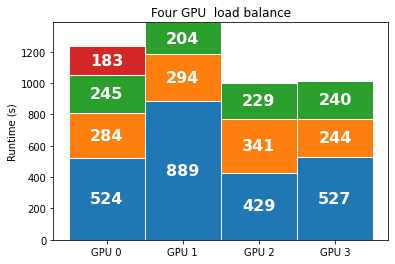

In [33]:
one_two = np.add(task_0, task_1).tolist()
all_three = np.add(one_two, task_2).tolist()
plt.xticks(np.arange(0, 4) , ["GPU 0" , "GPU 1", "GPU 2","GPU 3"])
ax1 = plt.bar(r, task_0, edgecolor='white', width=1)
ax2 = plt.bar(r, task_1, bottom=task_0, edgecolor='white', width=1)
ax3 = plt.bar(r, task_2, bottom=np.add(task_0, task_1).tolist(), edgecolor='white', width=1)
ax4 = plt.bar(r, task_3, bottom=all_three, edgecolor='white', width=1)
plt.ylabel("Runtime (s)")
plt.title("Four GPU  load balance")

for r1, r2, r3, r4 in zip(ax1, ax2, ax3, ax4):
    h1 = r1.get_height()
    h2 = r2.get_height()
    h3 = r3.get_height()
    h4 = r4.get_height()
    plt.text(r1.get_x() + r1.get_width() / 2., h1 / 2., "%s" % (str(int(h1)) if h1 > 0 else ""), ha="center", va="center", color="white", fontsize=16, fontweight="bold")
    plt.text(r2.get_x() + r2.get_width() / 2., h1 + h2 / 2., "%s" % (str(int(h2)) if h2 > 0 else ""), ha="center", va="center", color="white", fontsize=16, fontweight="bold")
    plt.text(r2.get_x() + r2.get_width() / 2., h1 + h2 + h3 / 2., "%s" % (str(int(h3)) if h3 > 0 else ""), ha="center", va="center", color="white", fontsize=16, fontweight="bold")
    plt.text(r2.get_x() + r2.get_width() / 2., h1 + h2 + h3 + h4 / 2., "%s" %  (str(int(h4)) if h4 > 0 else ""), ha="center", va="center", color="white", fontsize=16, fontweight="bold")
#plt.legend(['Task 0', 'Task 1', 'Task 2', 'Task 3'], loc='upper right', ncol=2, fancybox=True, shadow=True)
plt.savefig("../../Figures/four_GPU_vgg_load_balance_number.png", dpi=200)

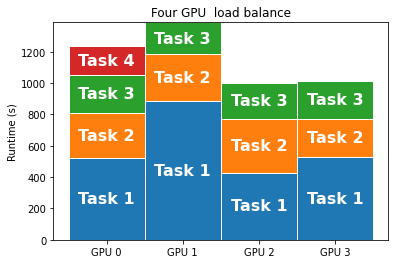

In [34]:
one_two = np.add(task_0, task_1).tolist()
all_three = np.add(one_two, task_2).tolist()
plt.xticks(np.arange(0, 4) , ["GPU 0" , "GPU 1", "GPU 2","GPU 3"])
ax1 = plt.bar(r, task_0, edgecolor='white', width=1)
ax2 = plt.bar(r, task_1, bottom=task_0, edgecolor='white', width=1)
ax3 = plt.bar(r, task_2, bottom=np.add(task_0, task_1).tolist(), edgecolor='white', width=1)
ax4 = plt.bar(r, task_3, bottom=all_three, edgecolor='white', width=1)
plt.ylabel("Runtime (s)")
plt.title("Four GPU  load balance")

for r1, r2, r3, r4 in zip(ax1, ax2, ax3, ax4):
    h1 = r1.get_height()
    h2 = r2.get_height()
    h3 = r3.get_height()
    h4 = r4.get_height()
    plt.text(r1.get_x() + r1.get_width() / 2., h1 / 2., "%s" % ("Task 1" if h1 > 0 else ""), ha="center", va="center", color="white", fontsize=16, fontweight="bold")
    plt.text(r2.get_x() + r2.get_width() / 2., h1 + h2 / 2., "%s" % ("Task 2" if h2 > 0 else ""), ha="center", va="center", color="white", fontsize=16, fontweight="bold")
    plt.text(r2.get_x() + r2.get_width() / 2., h1 + h2 + h3 / 2., "%s" % ("Task 3" if h3 > 0 else ""), ha="center", va="center", color="white", fontsize=16, fontweight="bold")
    plt.text(r2.get_x() + r2.get_width() / 2., h1 + h2 + h3 + h4 / 2., "%s" %  ("Task 4" if h4 > 0 else ""), ha="center", va="center", color="white", fontsize=16, fontweight="bold")
#plt.legend(['Task 0', 'Task 1', 'Task 2', 'Task 3'], loc='upper right', ncol=2, fancybox=True, shadow=True)
plt.savefig("../../Figures/four_GPU_vgg_load_balance_task.png", dpi=200)

In [13]:
with open('../timing_info/vgg/three_gpu/three_gpu_cifar10.json', 'r') as f:
    three_gpu_es = json.load(f)

FileNotFoundError: [Errno 2] No such file or directory: '../timing_info/vgg/three_gpu/three_gpu_cifar10.json'

In [ ]:
three_gpu_totals = {}

for layer in three_gpu_es[0:-1:]:
    print(layer)
    if layer['rank'] not in three_gpu_totals:
        three_gpu_totals[layer['rank']] = layer['run_time']
    else:
        three_gpu_totals[layer['rank']] += layer['run_time']

In [ ]:
three_gpu_totals

In [ ]:
gpu_0 = [layer['run_time'] for layer in three_gpu_es[:-1:] if layer['rank'] == 0]
print([layer['layer'] for layer in three_gpu_es[:-1:] if layer['rank'] == 0])
print(np.cumsum(gpu_0))
gpu_1 = [layer['run_time'] for layer in three_gpu_es[:-1:] if layer['rank'] == 1]
print([layer['layer'] for layer in three_gpu_es[:-1:] if layer['rank'] == 1])
print(np.cumsum(gpu_1))
gpu_2 = [layer['run_time'] for layer in three_gpu_es[:-1:] if layer['rank'] == 2]
print([layer['layer'] for layer in three_gpu_es[:-1:] if layer['rank'] == 1])
print(np.cumsum(gpu_2))

In [ ]:
gpu_1.append(0)
gpu_2.append(0)

In [ ]:
task_0 = [gpu_0[0], gpu_1[0], gpu_2[0]]
task_1 = [gpu_0[1], gpu_1[1], gpu_2[1]]
task_2 = [gpu_0[2], gpu_1[2], gpu_2[2]]
task_3 = [gpu_0[3], gpu_1[3], gpu_2[3]]
task_4 = [gpu_0[4], gpu_1[4], gpu_2[4]]

In [ ]:
r = [0, 1, 2]
names = ['gpu_0', 'gpu_1', 'gpu_2']

In [ ]:
one_two = np.add(task_0, task_1).tolist()
all_three = np.add(one_two, task_2).tolist()
all_four = np.add(all_three, task_3).tolist()
plt.xticks(np.arange(0, 3) , ["GPU 0" , "GPU 1", "GPU 2"])
plt.ylabel("Runtime (s)")
plt.title("Three GPU load balance")
plt.bar(r, task_0, edgecolor='white', width=1)
plt.bar(r, task_1, bottom=task_0, edgecolor='white', width=1)
plt.bar(r, task_2, bottom=np.add(task_0, task_1).tolist(), edgecolor='white', width=1)
plt.bar(r, task_3, bottom=all_three, edgecolor='white', width=1)
plt.bar(r, task_4, bottom=all_four, edgecolor='white', width=1)

plt.legend(['Task 0', 'Task 1', 'Task 2', 'Task 3', 'Task 4'], loc='upper right', bbox_to_anchor=(.95, 1.05), ncol=1, fancybox=True, shadow=True)
plt.savefig("../Figures/three_GPU_vgg_load_balance.png", dpi=200)